Контрольная работа Шин А.Е ПИ19-3 Вариант 74

In [1]:
from functools import lru_cache
import numpy as np

Система имеем 15 дискретных состояний. Изменение состояний происходит
в дискретные моменты времени с заданной вероятность. 

In [2]:
def t_prob(matrix, step):                                     
    """Вероятность перехода из x в y за step шагов"""
    return np.linalg.matrix_power(matrix, step)

@lru_cache(maxsize=None)
def makyr(step):
    return t_prob(matrix, step) - sum([makyr(m) * t_prob(matrix, step - m) for m in range(1, step)])

@lru_cache(maxsize=None)
def makyr2(step):
    res = t_prob(matrix, step) - sum([makyr2(m) * t_prob(matrix, step - m) for m in range(1, step)])
    result.append(np.diagonal(res))
    return res

@lru_cache(maxsize=None)
def makyr3(step):
    res = t_prob(matrix, step) - sum([makyr3(m) * t_prob(matrix, step - m) for m in range(1, step)])
    result.append(step * np.diagonal(res))
    return res

def mat_power_skip(left, right, step, res1=None, res2=None):   
    rn = range(len(left))
    # print(step)
    right=np.array([[sum(left[i, m] * right[m, j] if m != j else 0 for m in rn) for j in rn] for i in rn])
    if not(res1 is None):
        res1+=right
    if not(res2 is None):
        res2+=(992-step)*right
    if(step>1):
        right, res1, res2=mat_power_skip(left, right, step-1, res1, res2)
    
    # print(f'3 {right}')
    return right, res1, res2

def matrix_printer(matrix):
    for row in matrix:
        ryad=''
        for digit in row:
            if(digit==0):
                digit=int(digit)
            ryad+=str(digit)+', '
        print(ryad[:-2:])

Схема марковского процесса изображена на рисунке.

In [4]:
trans_mat = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0.08, 0, 0, 0.38, 0.54, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.06, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.84, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.21, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.11, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

])
print("Матрица переходов:")
matrix_printer(trans_mat)

In [5]:
'''1'''
step, state_1, state_2 = 7, 14, 12

print(f"\n1. вероятность того, что за {step} шагов система перейдет из состояния {state_1} в состояние {state_2}:")
print(np.linalg.matrix_power(trans_mat, step)[state_1 - 1, state_2 - 1])


1. вероятность того, что за 7 шагов система перейдет из состояния 14 в состояние 12:
0.0


In [6]:
'''2'''
step = 7

A = np.array([0.01,0,0.12,0.05,0.02,0.04,0.09,0.06,0.14,0.03,0.13,0.07,0.08,0.04,0.12])
print(f"\n2. вероятности состояний системы спустя {step} шагов, если в начальный "
      f"момент вероятность состояний были следующими step={A}:")
print((A.dot(np.linalg.matrix_power(trans_mat, step))))


2. вероятности состояний системы спустя 7 шагов, если в начальный момент вероятность состояний были следующими step=[0.01 0.   0.12 0.05 0.02 0.04 0.09 0.06 0.14 0.03 0.13 0.07 0.08 0.04
 0.12]:
[0.         0.         0.         0.04656072 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [7]:
'''3'''

step, state_1, state_2 = 8, 12, 8

prev = mat_power_skip(trans_mat, np.copy(trans_mat), step-1)[0]

print(f"\n3. вероятность первого перехода за {step} шагов из состояния {state_1} в состояние {state_2}:")
print((prev[state_1 - 1, state_2 - 1]))


3. вероятность первого перехода за 8 шагов из состояния 12 в состояние 8:
0.0


In [8]:
'''4'''

step, state_1, state_2 = 8, 11, 15
res = mat_power_skip(trans_mat,  np.copy(trans_mat), step-1, res1=np.copy(trans_mat))[1]
  
print(f"\n4. вероятность перехода из состояния {state_1} в состояние {state_2} не позднее чем за {step} шагов:")
print((res[state_1 - 1, state_2 - 1]))


4. вероятность перехода из состояния 11 в состояние 15 не позднее чем за 8 шагов:
0.0


In [9]:
'''5'''

state_1, state_2 = 2, 1
res = mat_power_skip(trans_mat, np.copy(trans_mat),993-1,res2=np.copy(trans_mat))[2]
    
print(f"\n5. среднее количество шагов для перехода из состояния {state_1} в состояние {state_2}:")
print((res[state_1 - 1, state_2 - 1]))


5. среднее количество шагов для перехода из состояния 2 в состояние 1:
0.08


In [10]:
'''6'''

step, state_1 = 12, 6

matrix = np.copy(trans_mat)
probbb = t_prob


print(f"\n6. вероятность первого возвращения в состояние {state_1} за {step} шагов:")
print((np.diagonal(makyr(step))[state_1 - 1]))


6. вероятность первого возвращения в состояние 6 за 12 шагов:
0.0


In [11]:
'''7'''

step, state_1 = 8, 13

matrix = np.copy(trans_mat)
probbb = t_prob
result = []



makyr2(step)
    

print(f"\n7. вероятность возвращения в состояние {state_1} не позднее чем за {step} шагов")
print((sum(result)[state_1 - 1]))


7. вероятность возвращения в состояние 13 не позднее чем за 8 шагов
0.0


In [ ]:
'''8'''

state_1 = 3

matrix = np.copy(trans_mat)
probbb = t_prob
result = []



makyr3(993)

print(f"\n8. среднее время возвращения в состояние {state_1}")
print((sum(result)[state_1 - 1]))

In [ ]:
'''9'''

matrix = np.copy(trans_mat).transpose()
np.fill_diagonal(matrix, np.diagonal(matrix) - 1)
matrix[-1, :] = 1

vect = np.zeros(len(matrix))
vect[-1] = 1


    
print("\n9. установившиеся вероятности:")
print((np.linalg.inv(matrix).dot(vect)))


Задание 2

Задана система массового обслуживания со следующими характеристиками:
• интенсивность поступления λ=22
• каналов обслуживания m=4
• интенсивность обслуживания μ=6
• максимальный размер очереди n=12
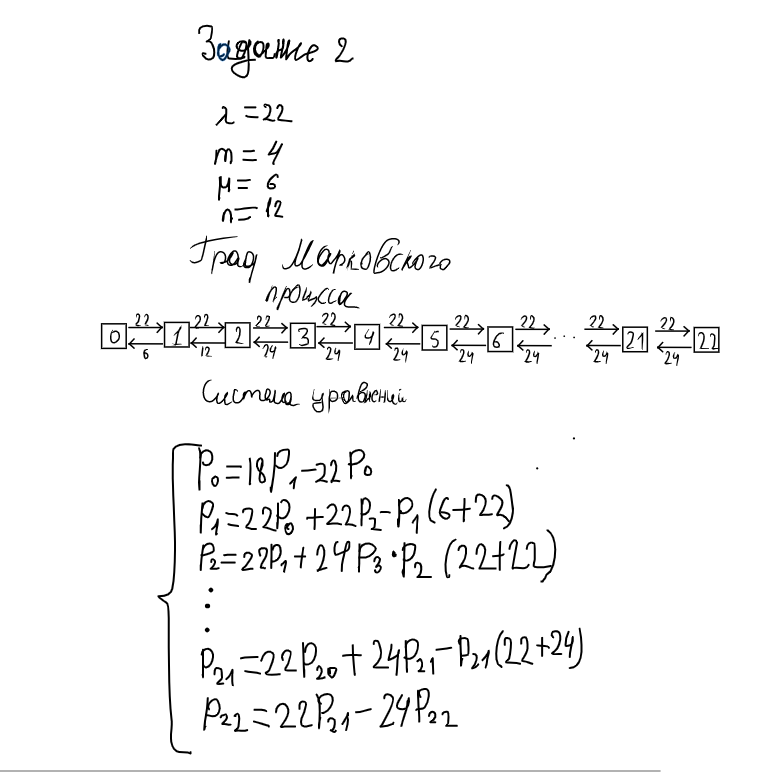

In [14]:
def init_matrix(n, m, la, mu):
    size = n + m + 1
    matrix = np.zeros((size, size))
    np.fill_diagonal(matrix[:, 1:], la)
    np.fill_diagonal(matrix[1:, :], [*[i * mu for i in range(1, m)], *[m * mu for j in range(n + 1)]])
    return matrix

def StProbDefiner(matrix):
    t_matrix = np.copy(matrix).transpose()
    np.fill_diagonal(t_matrix, [-sum(t_matrix[:, i]) for i in range(len(matrix))])
    t_matrix[-1, :] = 1

    vect = np.zeros(len(matrix))
    vect[-1] = 1

    return(np.linalg.inv(t_matrix).dot(vect))

la = 22
m = 4
mu = 6
n = 12
matrix = init_matrix(n, m, la, mu)
print(matrix)

[[ 0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 6.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 12.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 18.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 24.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 24.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 24.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 24.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 24.  0. 22.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 24.  0. 22.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 24.  0. 22.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 24.  0. 22.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 24.  0. 22.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 24.  0. 22.  0.  0.]
 [ 0. 

In [15]:
"""1"""

print("\na) Составьте граф марковского процесса, запишите систему уравнений Колмогорова и "
      "найдите установившиеся вероятности состояний:")
print(StProbDefiner(matrix))


a) Составьте граф марковского процесса, запишите систему уравнений Колмогорова и найдите установившиеся вероятности состояний:
[0.01237312 0.04536811 0.08317488 0.10165818 0.09318667 0.08542111
 0.07830269 0.07177746 0.06579601 0.06031301 0.05528692 0.05067968
 0.04645637 0.04258501 0.03903626 0.03578324 0.0328013 ]


In [16]:
"""2"""

print("\nb) Найдите вероятность отказа в обслуживании:")
print((StProbDefiner(matrix)[-1]))


b) Найдите вероятность отказа в обслуживании:
0.03280129918073149


In [17]:
"""3"""

print("\nc) Найдите относительную и абсолютную интенсивность обслуживания:")

print((1-StProbDefiner(matrix)[-1], (1-StProbDefiner(matrix)[-1])*la))


c) Найдите относительную и абсолютную интенсивность обслуживания:
(0.9671987008192685, 21.27837141802391)


In [18]:
"""4"""

print("\nd) Найдите среднюю длину в очереди:")
print((sum((i * StProbDefiner(matrix)[m + i]) for i in range(1, n + 1))))


d) Найдите среднюю длину в очереди:
3.6410969881068254


In [19]:
"""5"""

print("\ne) Найдите среднее время в очереди:")
print((sum(((i + 1) / (m * mu) * StProbDefiner(matrix)[m + i]) for i in range(n))))


e) Найдите среднее время в очереди:
0.16550440855031023


In [20]:
"""6"""

print("\nf) Найдите среднее число занятых каналов:")
print(((sum((i * StProbDefiner(matrix)[i]) for i in range(1, m + 1)) + sum((m * StProbDefiner(matrix)[i]) for i in range(m + 1, m + n + 1)))))



f) Найдите среднее число занятых каналов:
3.5463952363373177


In [21]:
"""7"""

print("\ng) Найдите вероятность того, что поступающая заявка не будет ждать в очереди:")
print((sum(StProbDefiner(matrix)[:m])))



g) Найдите вероятность того, что поступающая заявка не будет ждать в очереди:
0.24257429354987003


In [22]:
"""8"""

print("\nh) Найти среднее время простоя системы массового обслуживания:")

print((1 / np.sum(matrix, axis=1))[0])


h) Найти среднее время простоя системы массового обслуживания:
0.045454545454545456
